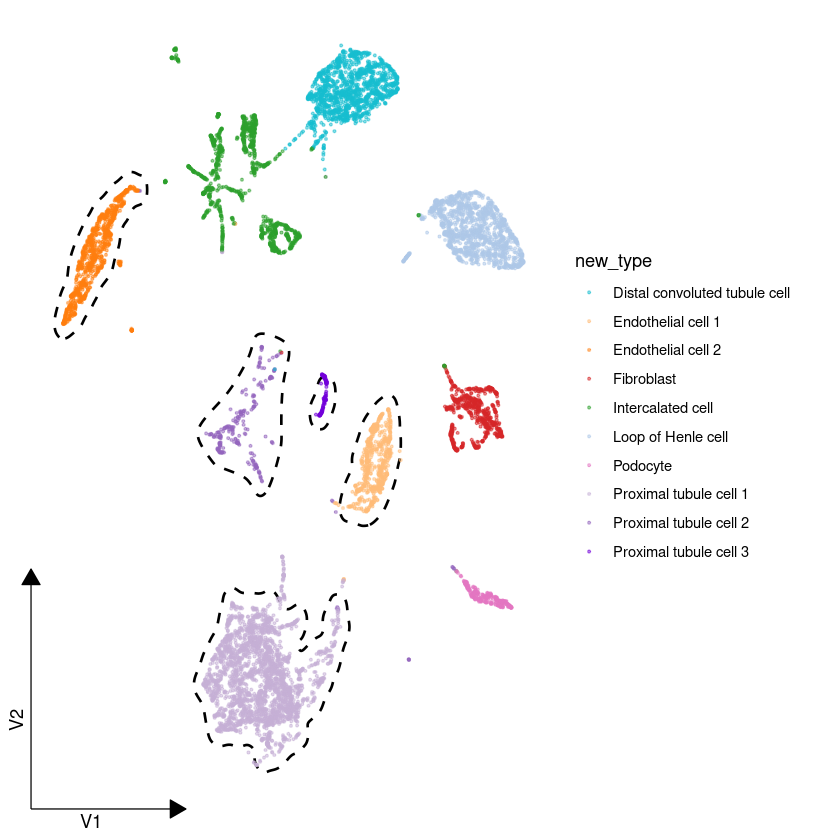

In [ ]:

# fig7 a----
library(Seurat)
library(devtools) 
library(ggunchull)
library(ggplot2)
library(tidydr)
library(dplyr)

umap <- read.csv("/home/zhangpeiru/Rworkspace/scmgca/code/data/mouse_kindy_10.csv")
meta <- read.csv("/home/zhangpeiru/Rworkspace/scmgca/code/data/new_dat_meta.csv")

merged <- merge(umap, meta, by = "X", all = F)
colors <- c("Proximal tubule cell 1" = "#C5B0D5",
            "Loop of Henle cell" = "#AEC7E8",
            "Distal convoluted tubule cell" = "#17BECF",
            "Endothelial cell 1" = "#FFBB78",
            "Endothelial cell 2" = "#FF7F0E",
            "Fibroblast" = "#D62728",
            "Neutrophil" = "#C49C94",
            "Intercalated cell" = "#2CA02C",
            "Principal cell" = "#8C564B",
            "Podocyte" = "#E376C2",
            "Proximal tubule cell 2" = "#9467BD",
            "Macrophage" = "#BCBD22",
            "Proximal tubule cell 3" = "#7200DA")

celltype <- c("Proximal tubule cell 1",
              "Proximal tubule cell 3",
              "Proximal tubule cell 2",
              "Endothelial cell 1",
              "Endothelial cell 2")

p <- ggplot(merged, aes(x = V1, y = V2, 
                 fill = new_type, color = new_type)) +
  lapply(celltype, function(ct) {
    stat_unchull(data = subset(merged, new_type == ct),
                 alpha = 0, 
                 linewidth = 0.75,
                 show.legend = FALSE,
                 color = "black",     
                 linetype = "dashed", 
                 delta = 0.5, 
                 th = 0.2,
                 n = 10)
  }) +
  geom_point(size = 0.5,alpha = 0.5) +
  theme_dr() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.line = element_line(linewidth = 1) 
  ) +
  scale_fill_manual(values = colors) +
  scale_color_manual(values = colors) +
  guides(fill = "none") 
p


Warning message in DoHeatmap(new, features = top10$gene, group.colors = colors, :
“The following features were omitted as they were not found in the scale.data layer for the RNA assay: Sh3bp2, Tmem169, Gm10787, Vill, Gm36231, Hsf2bp, Gm29571, Stra6l, Slc5a4a, Gm14320, 5730420D15Rik, Pxylp1, Vwa2, Foxq1, Pantr1, Sv2a, Ckb, Mturn, Enpp1, Slc5a1, Pygl, Ocln, Clcnka, Prelid2, Nrbp2, Prdm16os, Plau, Gm47708, Fads6, Sostdc1, Myef2, Pak6, B4galt6, Gm16310, Slc6a17, Wfdc15b, Cytip, 2410003L11Rik, Rasgrp1, Abca4, Dusp15, Gp2, 4732465J04Rik, Fa2h, Gm13075, Lrrc66, Pla1a, Sim2, Rap1gap, Mfsd4a, Cyfip2, Sorl1, Lnx1, Efhd1, Tfap2b, Me3, Ppp1r1a, Angptl4, Grhl1, Cdkn2c, Ccdc69, Abhd15, Hcar1, Ppp1r3b, Slc43a1, Apcdd1, Ucp3, Nnmt, Gm26671, Nat8l, Slc22a3, Trarg1, Acsm3, Cd1d1, Sh2b2, Adig, Aoc3, Ezh2, G2e3, Acot3, Sms, Smc4, 9130016M20Rik, Cks2, B230216N24Rik, Cela1, Cpox, Amacr, Cyp2j9, Slc19a1, Cldn2, Gm20528, Gpt2, L2hgdh, Rnaseh2b, Gm41031, Pstpip2, Fmo4, Slc22a2, Aadac, Tfec, Steap2, Fam151a, Lr

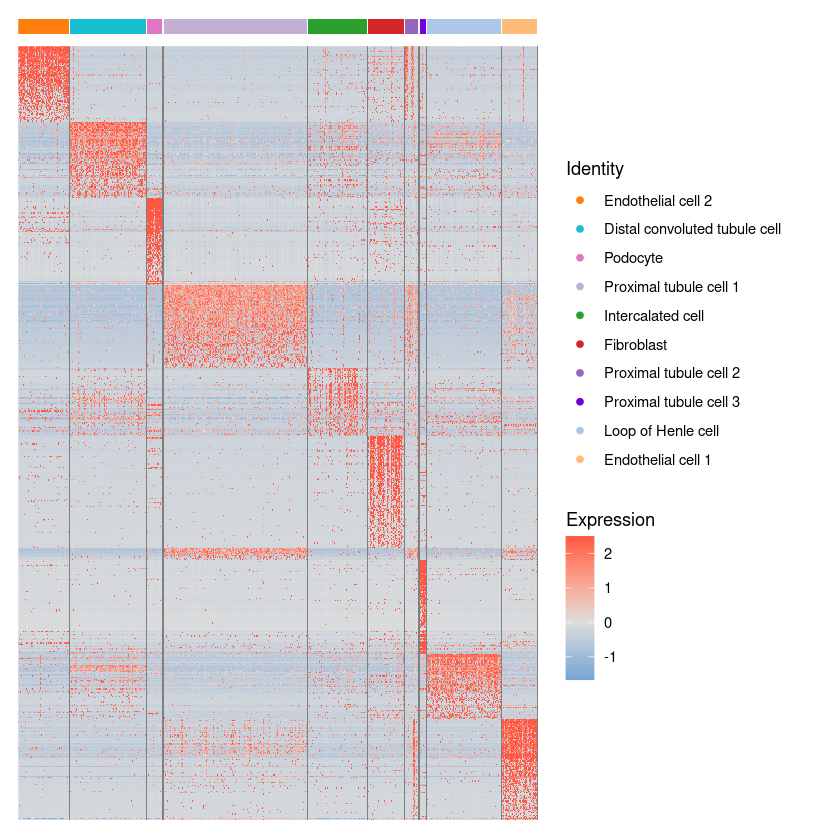

In [ ]:


# fig7 b
colors <- c("Proximal tubule cell 1" = "#C5B0D5",
            "Loop of Henle cell" = "#AEC7E8",
            "Distal convoluted tubule cell" = "#17BECF",
            "Endothelial cell 1" = "#FFBB78",
            "Endothelial cell 2" = "#FF7F0E",
            "Fibroblast" = "#D62728",
            "Neutrophil" = "#C49C94",
            "Intercalated cell" = "#2CA02C",
            "Principal cell" = "#8C564B",
            "Podocyte" = "#E376C2",
            "Proximal tubule cell 2" = "#9467BD",
            "Macrophage" = "#BCBD22",
            "Proximal tubule cell 3" = "#7200DA")

new <- readRDS("/home/zhangpeiru/Rworkspace/scmgca/code/data/new_mouse_RNA_new.rds")
new <- SetIdent(new, value = new$new_type)
all.marker <- read.csv("/home/zhangpeiru/Rworkspace/scmgca/code/data/end_all_markers.csv",row.names = 1)
top10 <- all.marker %>% group_by(cluster) %>% top_n(n = 100,wt = avg_log2FC)
DoHeatmap(new, features = top10$gene, group.colors = colors,label = F,) +
  scale_fill_gradient2(low = "#008bd0", mid = "#dddddc", high = "#ff5743", midpoint = 0) +
  theme(axis.text.y = element_blank())


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 4.7 GiB”


[1] 9649

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,8028882,428.8,13686607,731.0,12817877,684.6
Vcells,1144689234,8733.3,2237075343,17067.6,2040246014,15565.9


Centering and scaling data matrix

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


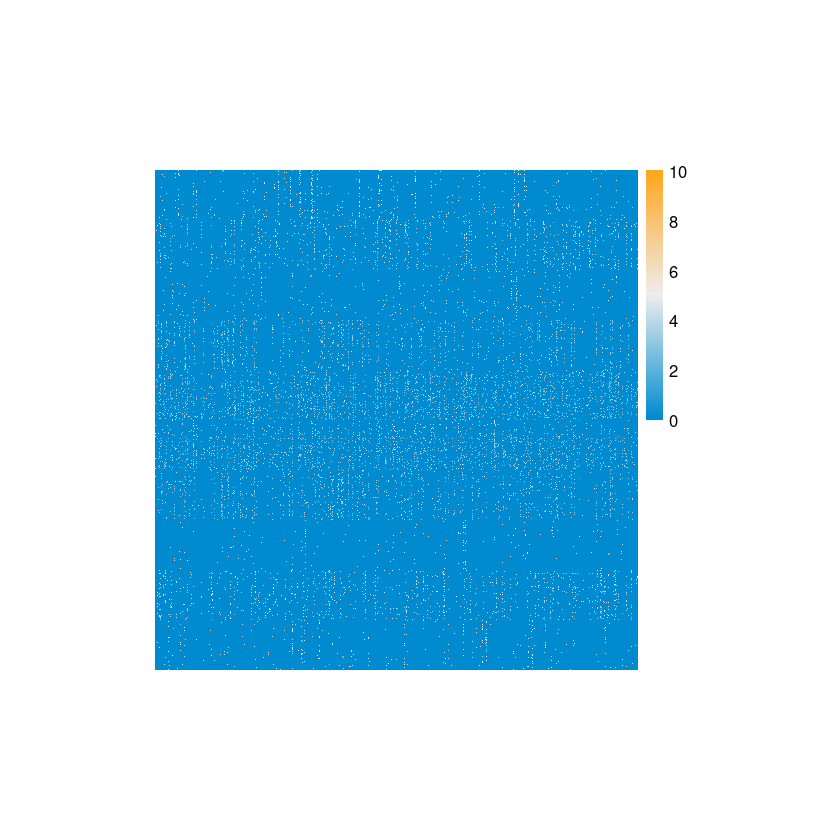

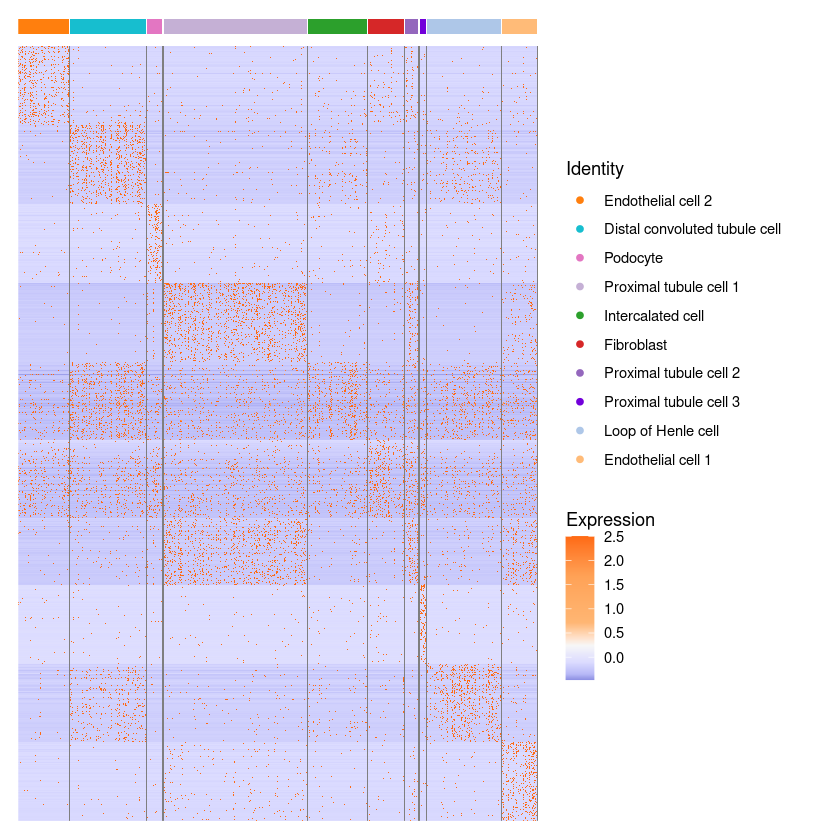

In [ ]:



library(Seurat)
library(Signac)
library(dplyr)
library(ggplot2)
atac <- readRDS("/home/zhangpeiru/Rworkspace/scmgca/code/data/raw_all.rds")
all.marker <- read.csv("/home/zhangpeiru/Rworkspace/scmgca/code/data/Diff_gene_table.csv",row.names = 1)
top10 <- all.marker %>% group_by(cluster) %>% top_n(n = 100,wt = avg_log2FC)

atacdata <- atac@assays$ATAC$data 
atacdata_df <- data.frame(atacdata)
atacdata_df$gene <- rownames(atacdata_df)
atacheatmap <- left_join(top10, atacdata_df, by = "gene")

atacdata <- atac@meta.data$new_type
group <- data.frame(group = atac@meta.data$new_type)
rownames(group) <- rownames(atac@meta.data)
rownames(group) <- gsub("-", ".", rownames(group))
length(intersect(colnames(atacheatmap[,8:9656]),rownames(group)))

custom_colors <- colorRampPalette(c("#008bd0", "#eeeeee", "#ffa61d"))(100)
anno_color <- list(
  colors <- c("Proximal tubule cell 1" = "#C5B0D5",
              "Loop of Henle cell" = "#AEC7E8",
              "Distal convoluted tubule cell" = "#17BECF",
              "Endothelial cell 1" = "#FFBB78",
              "Endothelial cell 2" = "#FF7F0E",
              "Fibroblast" = "#D62728",
              "Neutrophil" = "#C49C94",
              "Intercalated cell" = "#2CA02C",
              "Principal cell" = "#8C564B",
              "Podocyte" = "#E376C2",
              "Proximal tubule cell 2" = "#9467BD",
              "Macrophage" = "#BCBD22",
              "Proximal tubule cell 3" = "#7200DA")  
)


library(pheatmap)

pheatmap(
  atacheatmap[,8:9656],
  scale = "none",
  color = custom_colors,
  border_color = NULL,
  cellwidth = 0.03, cellheight = 0.3,
  cluster_rows = F, 
  cluster_cols = F,
  #treeheight_row = 20, treeheight_col = 10,
  #fontsize = 12,
  show_rownames = F, 
  show_colnames = F,
)


gc()
DefaultAssay(atac) <- 'ATAC'
atac <- ScaleData(atac,features = rownames(atac))
# pdf("/home/zhangpeiru/Rworkspace/scmgca/code/kidney/fig7b_atac_heatmap.pdf",width = 6,height = 6)
DoHeatmap(atac, features = top10$gene, group.colors = colors, label = FALSE) +
  scale_fill_gradientn(
    colors = c("#8d90e3", "#b7b9f7", "#DBDBFF", "#f7f7f7", "#ffb673", "#ffa257","#ff6a13"), 
    values = scales::rescale(c(0, 0.1, 0.3, 0.6, 1, 1.8, 2.5))
  ) +
  theme(axis.text.y = element_blank())


png 
  3

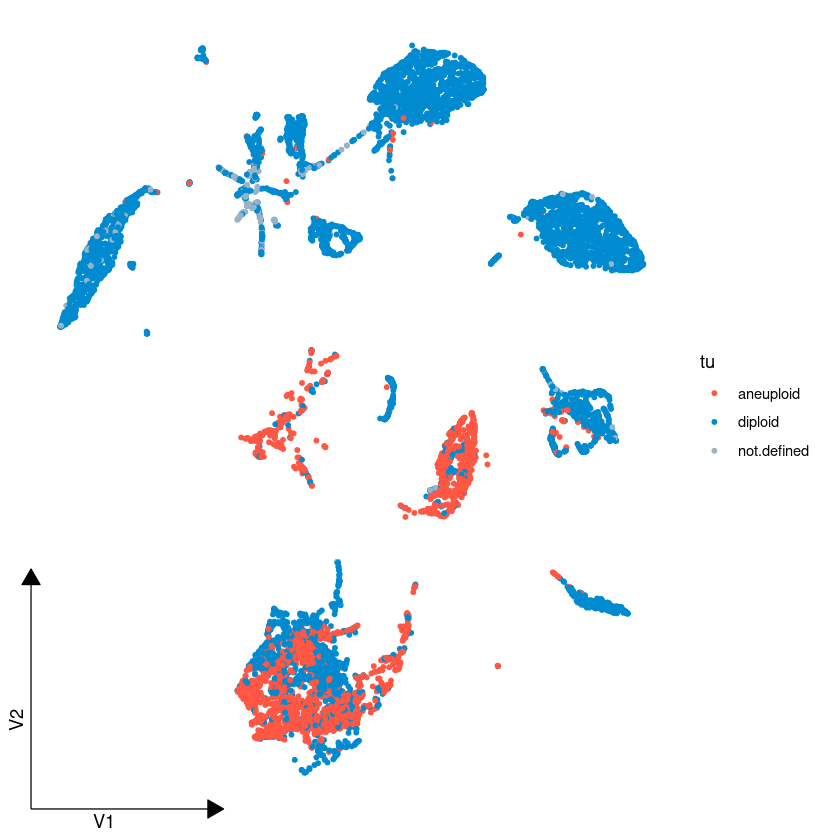

In [ ]:

# fig7 c 

colors <- c("aneuploid"="#ff5743",
            "diploid"="#008bd0",
            "not.defined"="#99b3c6")
p <- ggplot(merged, aes(x = V1, y = V2, 
                        fill = tu, color = tu)) +
  geom_point(size = 1) +
  theme_dr() +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.line = element_line(linewidth = 1) 
  ) +
  scale_fill_manual(values = colors) +
  scale_color_manual(values = colors) +
  guides(fill = "none") 
p
dev.off()
# ggsave("/home/zhangpeiru/Rworkspace/scmgca/code/kidney/fig7c_left.pdf",p,width = 6.5,height = 6)


Using new_type as id variables



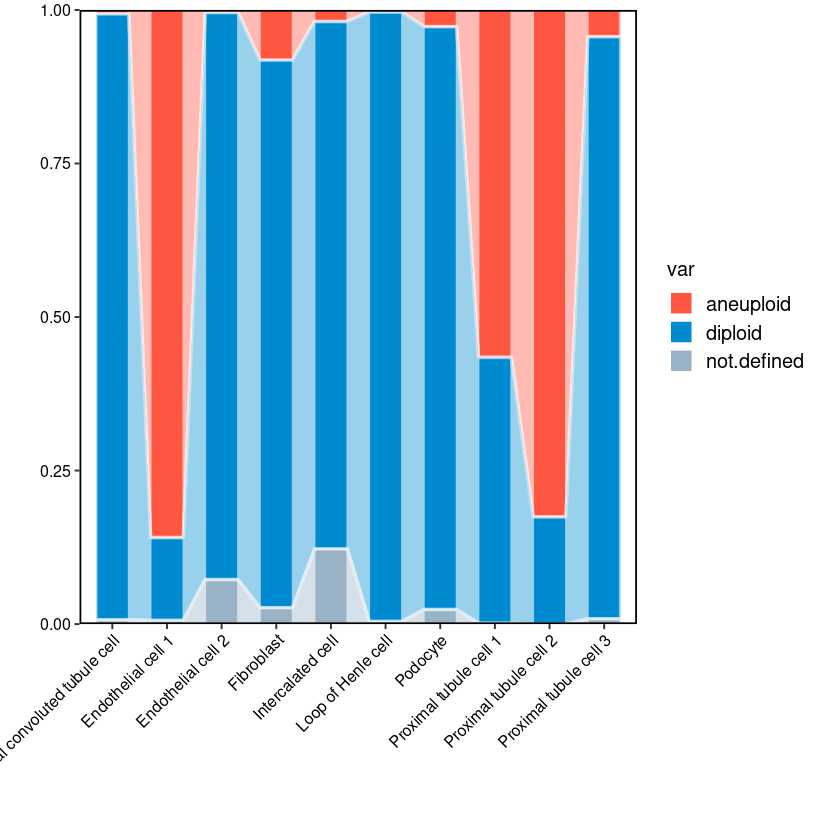

In [ ]:

# fig7 c
#result <- as.data.frame.matrix(table(merged$new_type, merged$tu))

library(reshape2)
library(ggplot2)
library(ggalluvial)
library(ggh4x)
result <- table(merged$new_type, merged$tu) %>%
  as.data.frame.matrix() %>%
  tibble::rownames_to_column(var = "new_type") %>%
  rowwise() %>%
  mutate(across(-new_type, ~ . / sum(c_across(-new_type)))) %>%
  ungroup()
melt.result <- melt(result)
colnames(melt.result) <- c("Part","var","value")
p <- ggplot(melt.result, aes(x = Part, y = value, fill = var,
                             stratum = var, alluvium = var)) +
  geom_col(position = 'stack', width = 0.6) +
  geom_stratum(width = 0.6, color = 'white') +
  geom_alluvium(alpha = 0.4, width = 0.6, color = 'white', linewidth = 1, curve_type = "linear") +
  scale_fill_manual(values = colors) +
  xlab('') + 
  ylab('') +
  scale_y_continuous(expand = c(0, 0)) +
  theme_bw(base_size = 12) + 
  theme(
    axis.text = element_text(color = "black"),
    axis.text.x = element_text(angle = 45, hjust = 1),  # 设置 x 轴标签旋转 45 度
    panel.border = element_rect(colour = "black", fill = NA, linewidth = 1),
    panel.grid = element_blank(),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 12)
  )
p
#("/home/zhangpeiru/Rworkspace/scmgca/code/kidney/fig7c_right.pdf", plot = p, height = 4, width = 6)




Loading required package: SeuratObject

Loading required package: sp




Attaching package: ‘SeuratObject’


The following object is masked from ‘package:Hmisc’:

    Key


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘Seurat’


The following object is masked from ‘package:Hmisc’:

    Key


Loading required package: Signac

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the Signac package.
  Please report the issue at <https://github.com/stuart-lab/signac/issues>.”
Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the Signac package.
  Please report the issue at <https://github.com/stuart-lab/signac/issues>.”


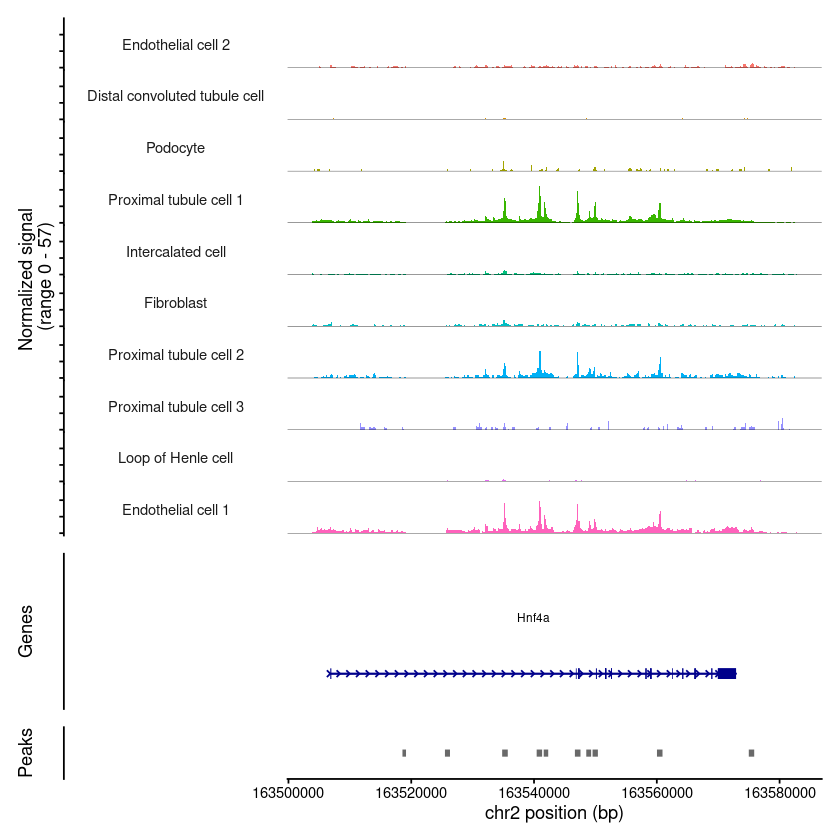

In [ ]:
# install.packages("rms")
library(rms)
library(Seurat)

atac <- readRDS("/home/zhangpeiru/Rworkspace/scmgca/code/data/raw_all.rds")

ra <- atac
# fig7 g----
Idents(ra) <- "new_type"
object = ra
region = "Hnf4a"
extend.upstream = 3000
extend.downstream = 10000
#object <- SortIdents(object)
#pdf("/home/zhangpeiru/Rworkspace/scmgca/code/kidney/fig_7g.pdf",width = 6.5,height = 6)

#install.packages("patchwork")

#.rs.restartR()

#library(Signac)
#library(Seurat)

CoveragePlot(
  object = object,
  region = region,
  extend.upstream = extend.upstream,
  extend.downstream = extend.downstream,
  annotation = TRUE,
  peaks = TRUE,
  links = TRUE
)



#dev.off()




Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`).”


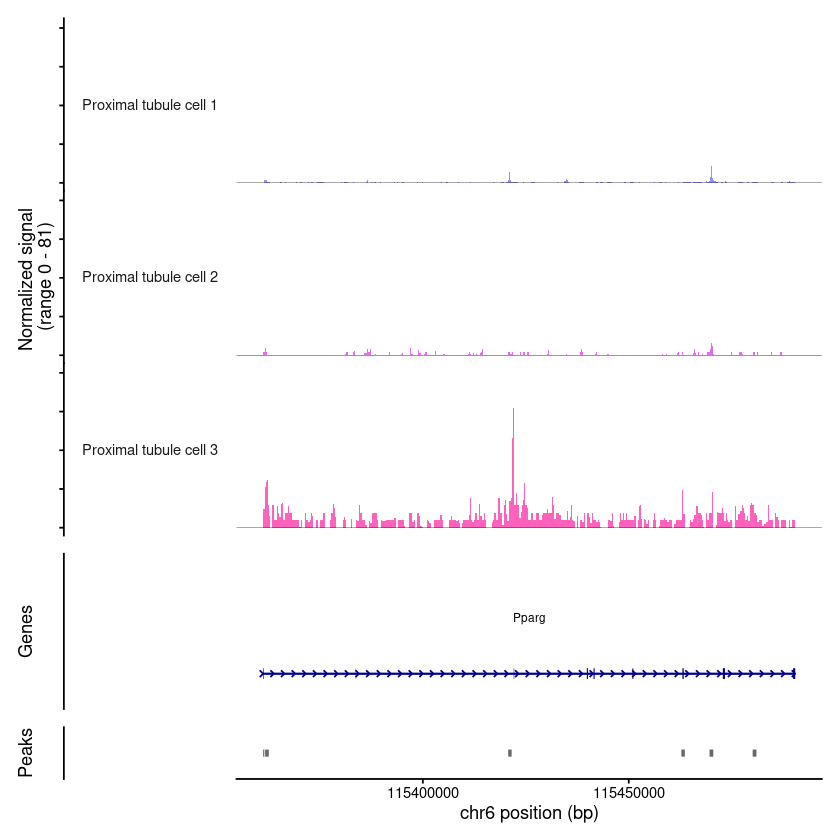

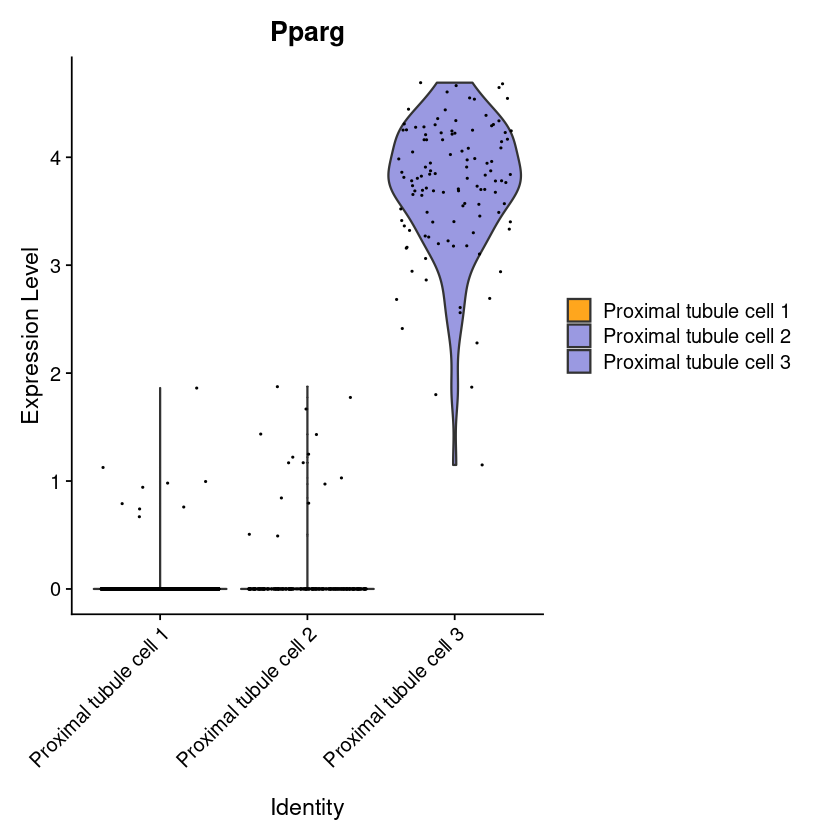

In [10]:
# fig7 i----

Idents(ra) <- "new_type"
object = ra
cell_types <- levels(Idents(object))
sorted_cell_types <- sort(cell_types)
Idents(object) <- factor(Idents(object), levels = sorted_cell_types)
region = "Pparg"
idents = c("Proximal tubule cell 1", "Proximal tubule cell 2", "Proximal tubule cell 3")
twocol <- c("Proximal tubule cell 1"="#ffa61d", "Proximal tubule cell 2"="#9a99e1", "Proximal tubule cell 3"="#9a99e1")
extend.upstream = 0
extend.downstream = 0


#pdf("/home/zhangpeiru/Rworkspace/scmgca/code/kidney/fig7i.pdf",width = 6.5,height = 3.5)
CoveragePlot(
  object = object,
  region = region,
  extend.upstream = extend.upstream,
  extend.downstream = extend.downstream,
  annotation = T,
  idents = idents,
  peaks = T,
  links = T
)
#dev.off()

new <- readRDS("/home/zhangpeiru/Rworkspace/scmgca/code/data/new_mouse_RNA_new.rds")
Idents(new) <- "new_type"
# pdf("/home/zhangpeiru/Rworkspace/scmgca/code/kidney/fig_7i-2.pdf",width = 6.5,height = 5)
VlnPlot(new,features = region,idents = idents,cols = twocol)
# dev.off()

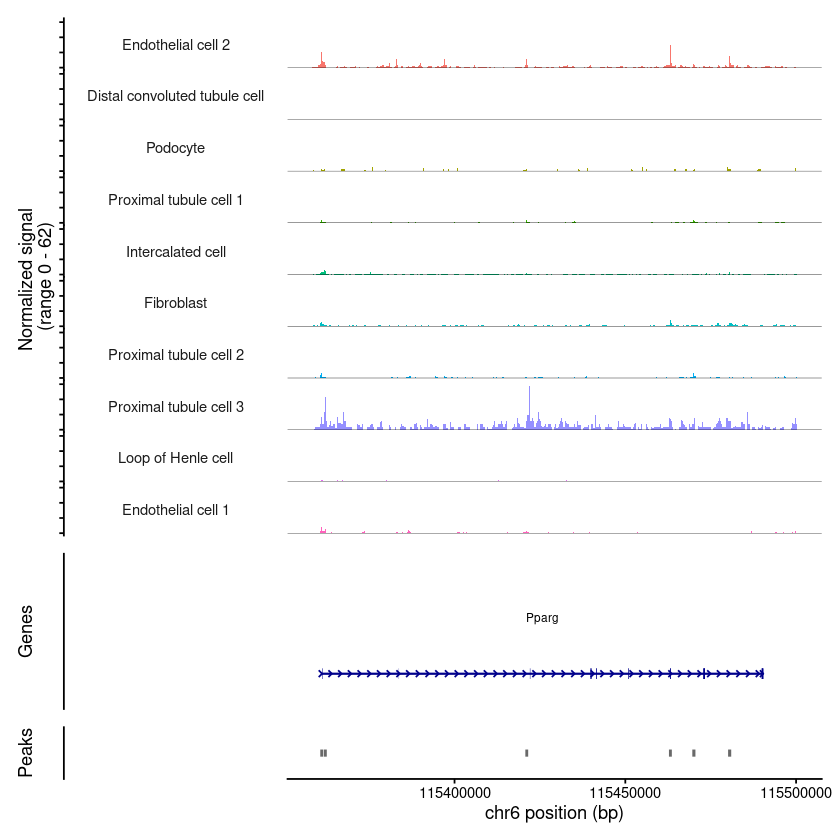

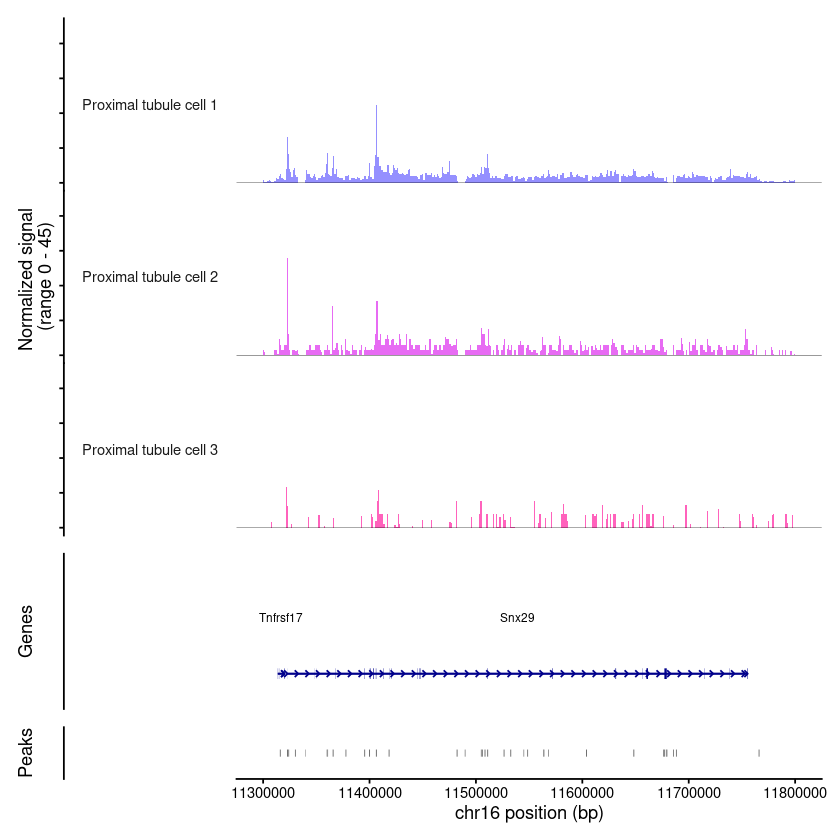

In [13]:
# fig8 b----
Idents(ra) <- "new_type"
object = ra
region = "Pparg"
extend.upstream = 3000

extend.downstream = 10000
#object <- SortIdents(object)
# pdf("/home/zhangpeiru/Rworkspace/scmgca/code/kidney/fig_8b.pdf",width = 6.5,height = 6)
CoveragePlot(
  object = object,
  region = region,
  #group.by = "new_type",
  extend.upstream = extend.upstream,
  extend.downstream = extend.downstream,
  annotation = T,
  peaks = T,
  links = T
)
# dev.off()






Idents(ra) <- "new_type"
object = ra
cell_types <- levels(Idents(object))
sorted_cell_types <- sort(cell_types)
Idents(object) <- factor(Idents(object), levels = sorted_cell_types)

region = "chr16-11300000-11800000"
idents = c("Proximal tubule cell 1", "Proximal tubule cell 2", "Proximal tubule cell 3")
twocol <- c("Proximal tubule cell 1"="#ffb69c", "Proximal tubule cell 2"="#e2dda2", "Proximal tubule cell 3"="#6f89ad")
extend.upstream = 0
extend.downstream = 0
  
# pdf(paste0("/home/zhangpeiru/Rworkspace/scmgca/code/kidney/",region,"_1.pdf"),width = 6.5,height = 3.8)
CoveragePlot(
  object = object,
  region = region,
  extend.upstream = extend.upstream,
  extend.downstream = extend.downstream,
  annotation = T,
  idents = idents,
  peaks = T,
  links = T
)
# dev.off()



idents = c("Proximal tubule cell 1", "Proximal tubule cell 2", "Proximal tubule cell 3")
twocol <- c("Proximal tubule cell 1"="#ffb69c", "Proximal tubule cell 2"="#e2dda2", "Proximal tubule cell 3"="#6f89ad")
extend.upstream = 0
extend.downstream = 0
